In [1307]:
import importlib
import matplotlib
import loading_helper
importlib.reload(loading_helper)
import plot_helper
importlib.reload(plot_helper)
import compute_helper
importlib.reload(compute_helper)
import jax.numpy as jnp


In [1299]:
run_dir_PINN = "runs/PINN/run_2"
run_dir_PINN_lam = "runs/PINN_lam/run_2"
run_dir_MTPINN = "runs/MTPINN/run_2"
run_dir_MTPINN_market = "runs/market/market_1"

"""UNCOMMENT for Synethic Benchmark Experiment"""
model_vanillaPINN, _, cfg, _ = loading_helper.load_model_and_history(run_dir_PINN, tag="3d_lam0p05") # 2d_lam0, 3d_lam0p05, 3d_lam0p1  
model_currPINN, _, _, _ = loading_helper.load_model_and_history(run_dir_PINN_lam, tag="alpha_1p0") # 2d_lam0, alpha_1p0
model_currMTPINN, _, _, _ = loading_helper.load_model_and_history(run_dir_MTPINN, tag="alpha_1p0") # 2d_lam0, alpha_1p0

models = {"Vanilla PINN": model_vanillaPINN, "PINN-λ-curr": model_currPINN, "MTPINN-λ-curr": model_currMTPINN} 

"""UNCOMMENT for Real-Market Experiment"""
#model_currMTPINN_market, _, cfg, _ = loading_helper.load_model_and_history(run_dir_MTPINN_market, tag="2d_lam0") # 2d_lam0, alpha_1p0

#models = {"MTPINN-λ-curr": model_currMTPINN_market}


T = float(cfg.T)
lam = float(getattr(cfg, "lam", 0))
kappa = float(getattr(cfg, "kappa", 0.1))
sigma = float(getattr(cfg, "sigma", 0.1))
x_range = tuple(getattr(cfg, "x_range", (-1.0, 1.0)))
X0 = x_range[1]

if hasattr(cfg, "s_range"):
    s_lo, s_hi = map(float, cfg.s_range)
    S = 0.5 * (s_lo + s_hi)   
else:
    S = 55.0                 

# simulation knobs
Ndt = 200
Npaths = 3
Npath_hist = 100


Loading history for runs/PINN/run_2


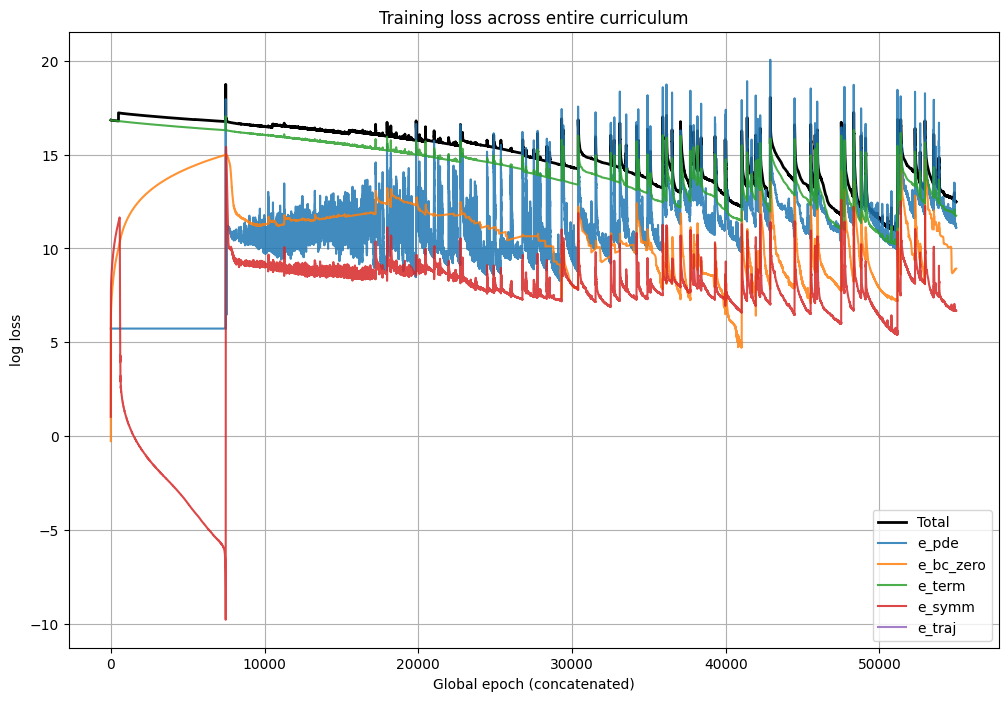

Loading history for runs/PINN_lam/run_2


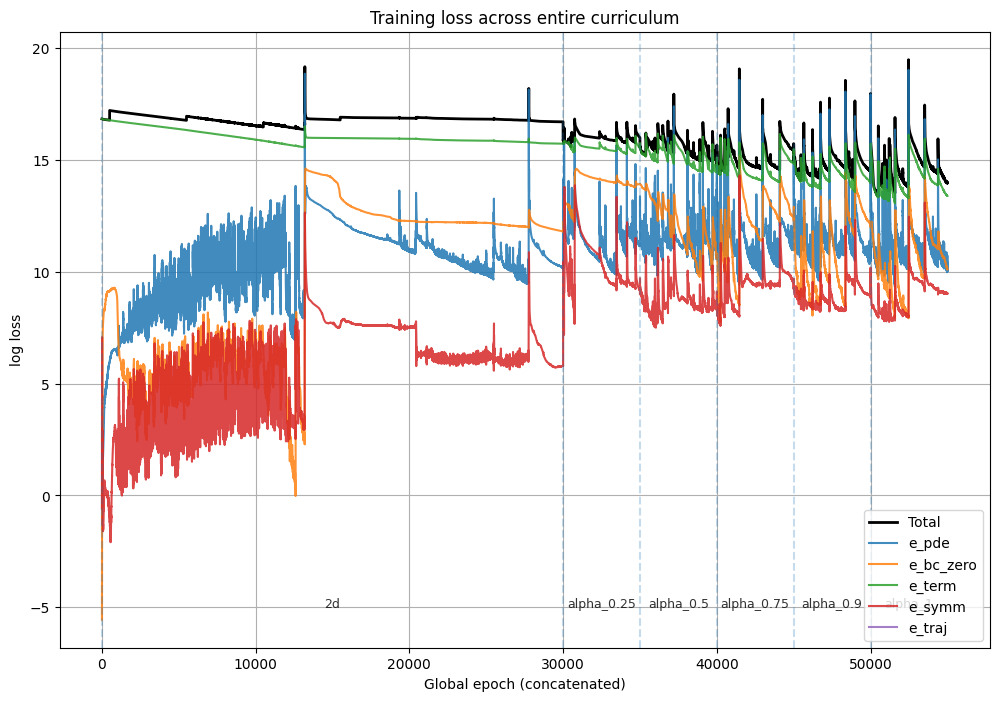

Loading history for runs/MTPINN/run_2


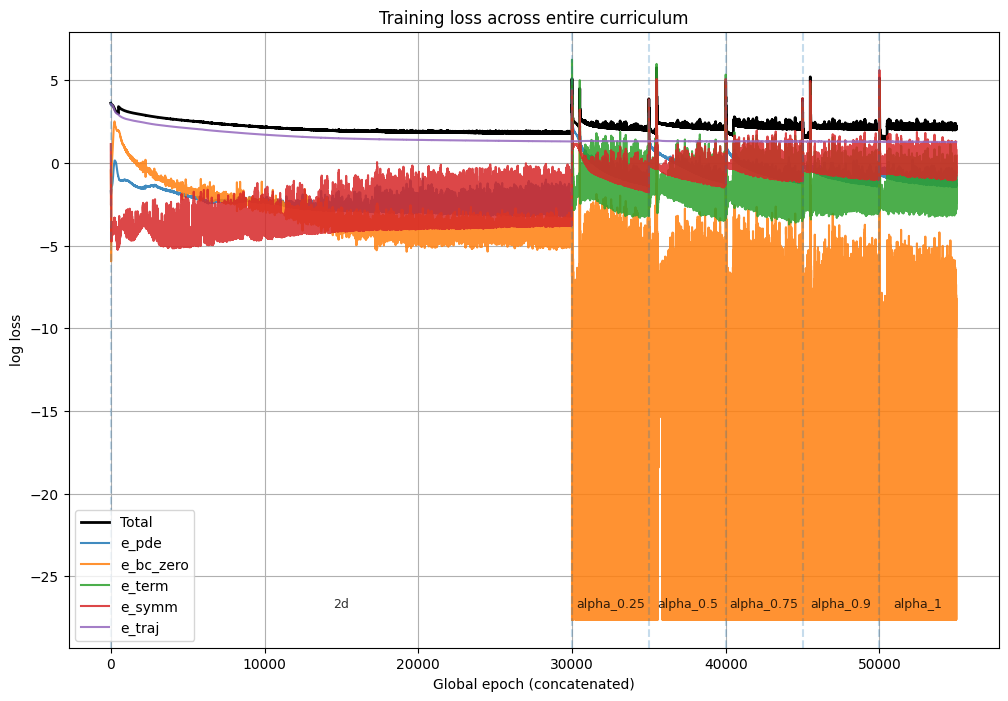

In [1209]:
for run_dir in [run_dir_PINN, run_dir_PINN_lam, run_dir_MTPINN]:
    print(f"Loading history for {run_dir}")
    all_hist = plot_helper.load_all_histories_for_plot(run_dir, prefer='2d')
    flat = plot_helper.flatten_history(all_hist)
    plot_helper.plot_flat_history(flat)


Plotting Vanilla PINN


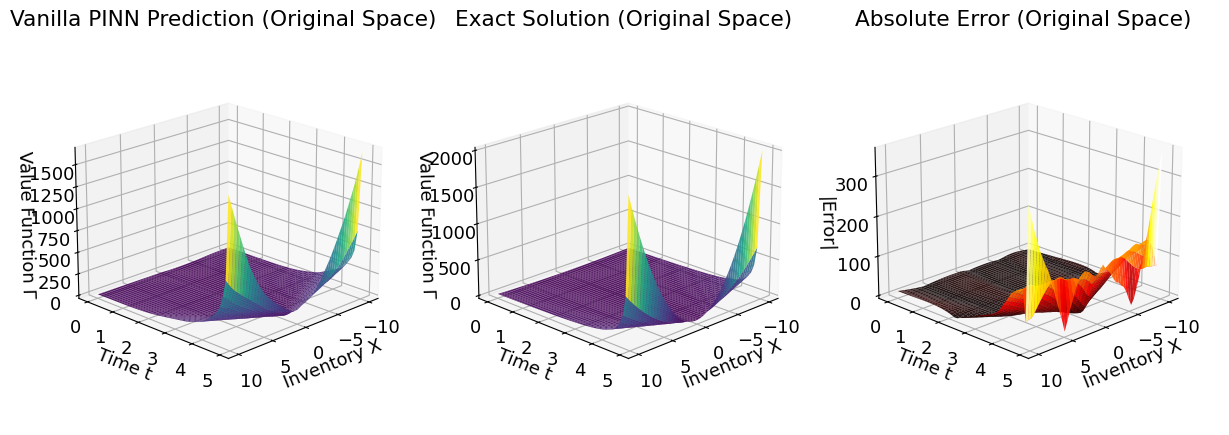

Original Space Error Statistics:
  Mean Absolute Error: 22.746076
  Max Absolute Error: 363.182072
  Mean Relative Error: 7.426498
  Max Relative Error: 428.298629
  L2 norm (RMSE): 45.452973


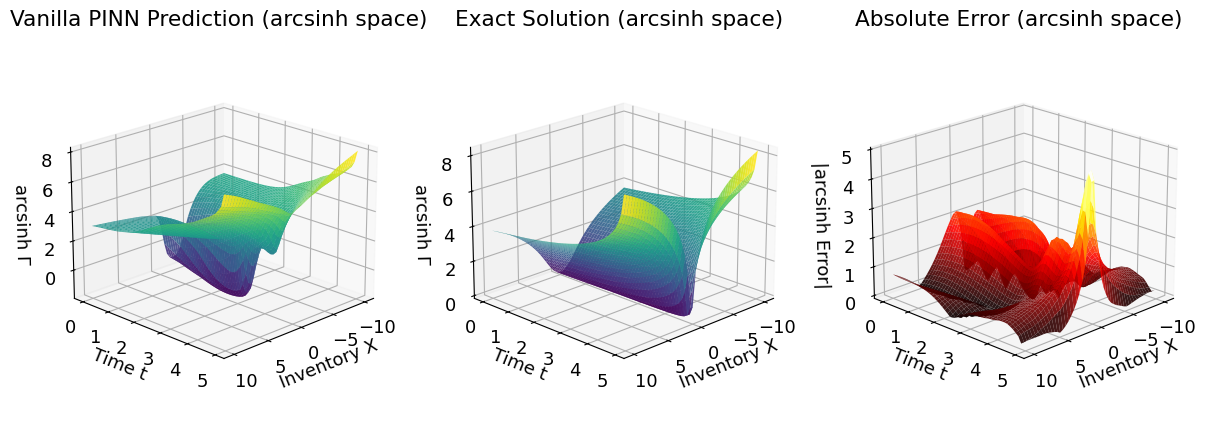

Arcsinh-Space Error Statistics:
  Mean Arcsinh Absolute Error: 0.799596
  Max Arcsinh Absolute Error: 4.963681
  Mean Arcsinh Relative Error: 3.660855
  Max Arcsinh Relative Error: 213.651087
  L2 norm (RMSE, arcsinh): 1.071061
Plotting MTPINN-λ-curr


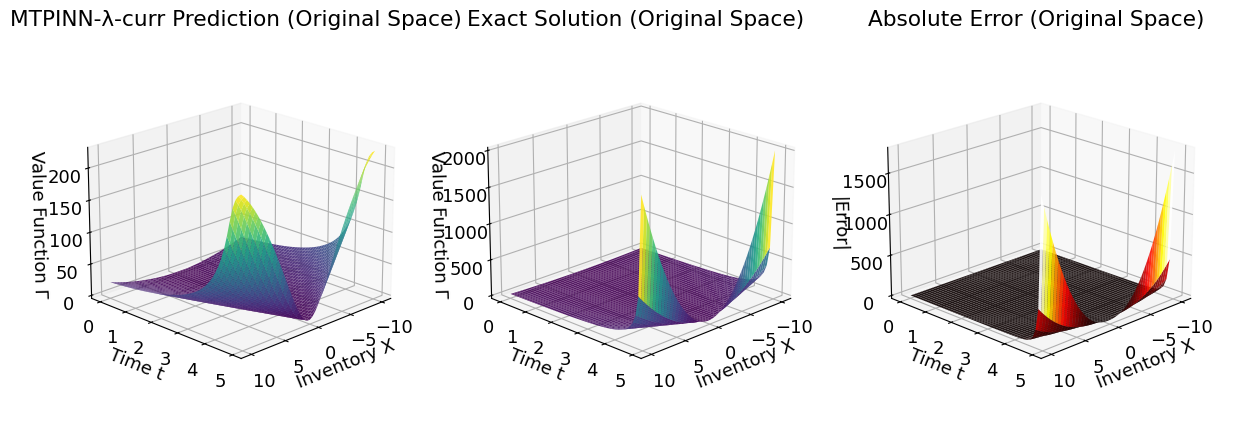

Original Space Error Statistics:
  Mean Absolute Error: 16.438570
  Max Absolute Error: 1773.533390
  Mean Relative Error: 0.235682
  Max Relative Error: 7.518284
  L2 norm (RMSE): 116.001849


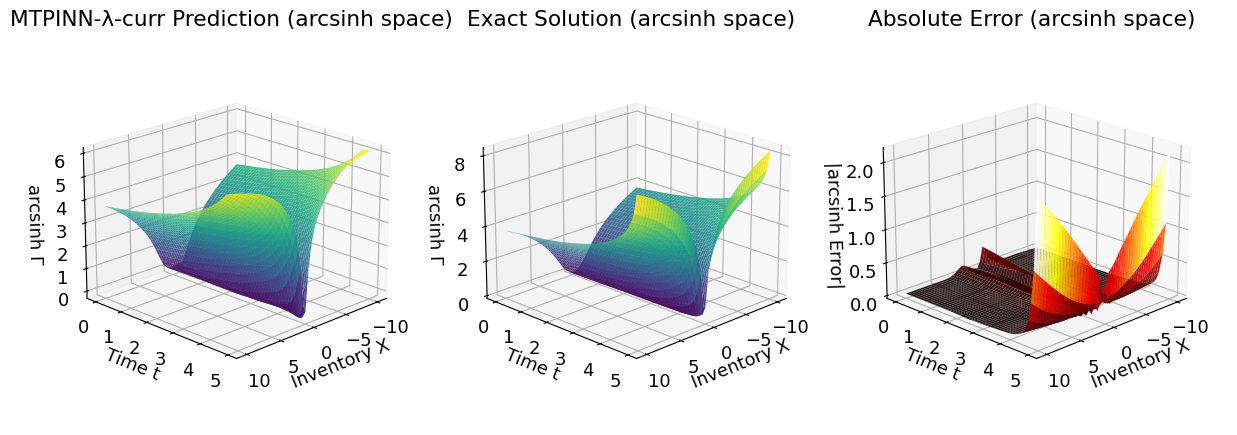

Arcsinh-Space Error Statistics:
  Mean Arcsinh Absolute Error: 0.115995
  Max Arcsinh Absolute Error: 2.178235
  Mean Arcsinh Relative Error: 0.183787
  Max Arcsinh Relative Error: 7.506022
  L2 norm (RMSE, arcsinh): 0.249857


In [1279]:
matplotlib.rcParams.update({'font.size': 13})

for name, model in models.items():
    print(f"Plotting {name}")
    plot_helper.plot_pinn_vs_exact(model, T=T, X0=X0, x_range=x_range, lam=lam, kappa=kappa, sigma=sigma, S=S, d3=False, label=name)


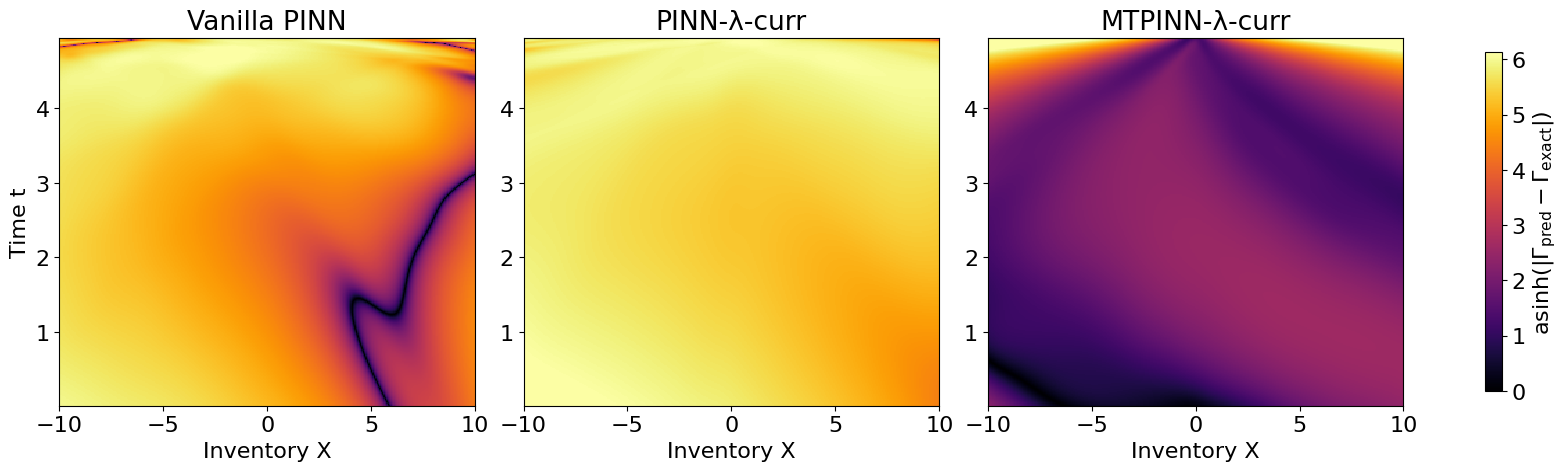

=== asinh(|error|) stats (shared scaling) ===
        Vanilla PINN: mean=4.675418  max=6.857404
         PINN-λ-curr: mean=5.580972  max=6.293761
       MTPINN-λ-curr: mean=2.103022  max=8.156416


In [1230]:
matplotlib.rcParams.update({'font.size': 16})

plot_helper.plot_error_heatmaps_multi(models, T=T, S=S, x_range=x_range, lam=lam, kappa=kappa, sigma=sigma, d3=True, grid=300, clip_pct=99)

In [1160]:
paths, dt = compute_helper.simulate_S(S0=S, sigma=sigma, T=T, Ndt=Ndt, Npaths=Npaths, seed=42)

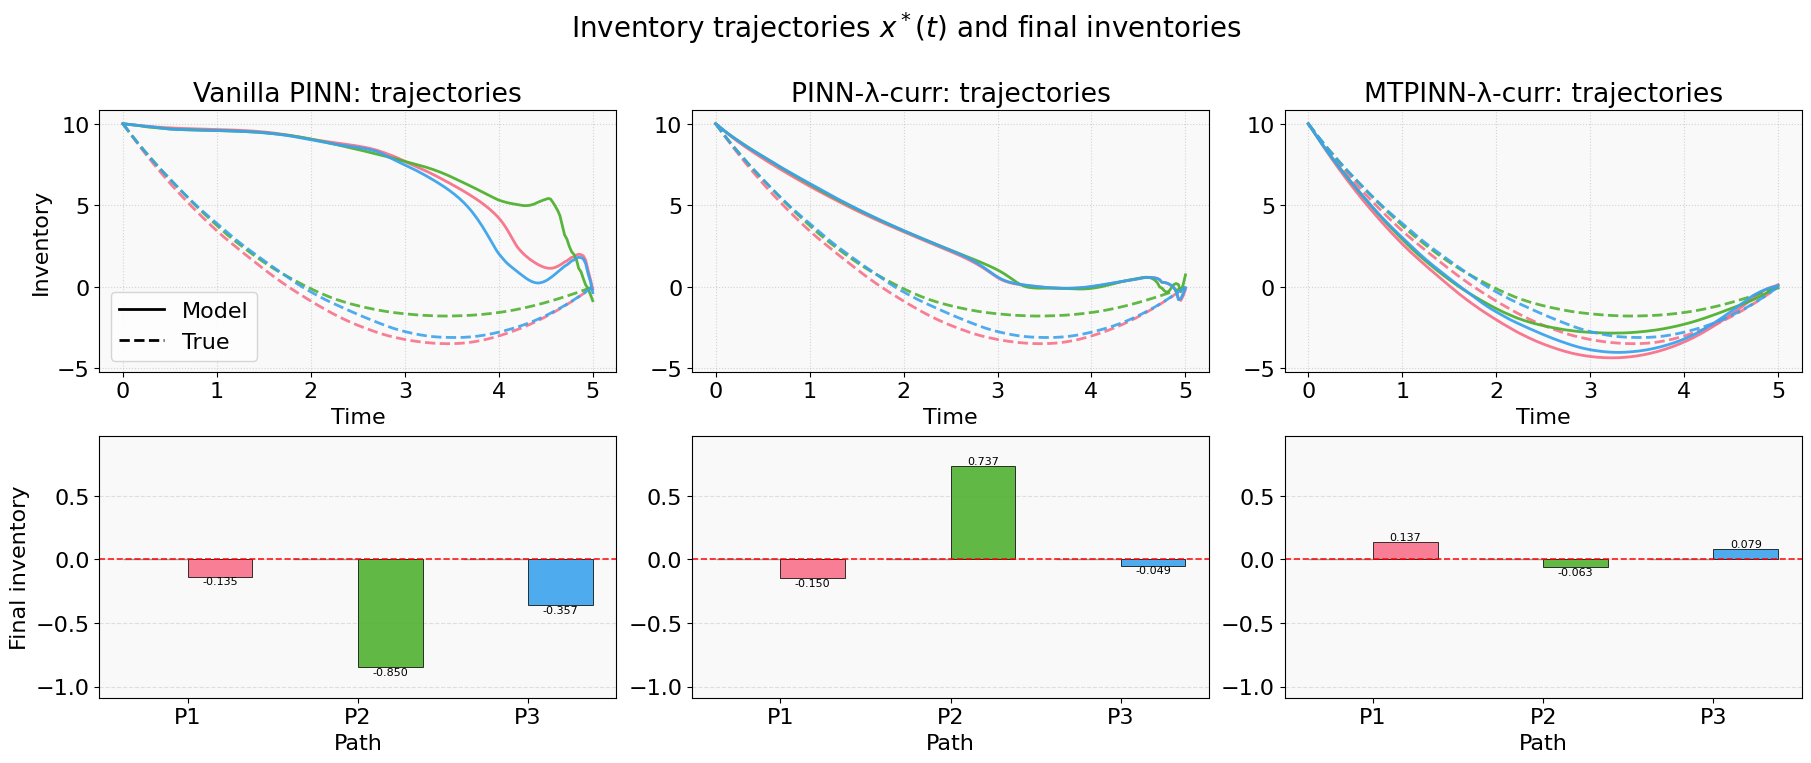

=== Inventory comparison ===
      Vanilla PINN | RMSE=7.401272  final mean=-0.447127  std=0.298791  max|final|=0.849852
       PINN-λ-curr | RMSE=2.829836  final mean=0.179773  std=0.396509  max|final|=0.737478
     MTPINN-λ-curr | RMSE=0.852377  final mean=0.051127  std=0.083992  max|final|=0.137403


In [1251]:
plot_helper.inventory_trajectory_multi(models, paths, dt, T=T, X0=X0, lam=lam, kappa=kappa, d3=True)

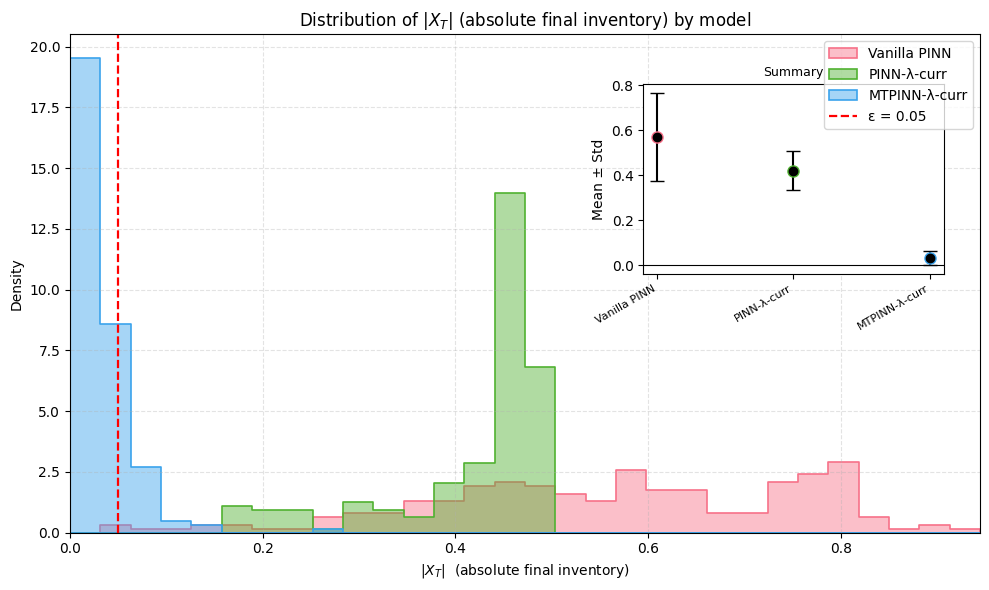

=== |X_T| stats by model ===
      Vanilla PINN: mean=0.569746  std=0.195983  p95=0.825997  max=1.059244P(|X_T|≤ε)=0.000
       PINN-λ-curr: mean=0.420182  std=0.084948  p95=0.480596  max=0.489062P(|X_T|≤ε)=0.000
     MTPINN-λ-curr: mean=0.030604  std=0.030143  p95=0.071829  max=0.265387P(|X_T|≤ε)=0.810


In [1308]:
matplotlib.rcParams.update({'font.size': 10})

plot_helper.inventory_trajectory_hist_multi(models, Ndt=Ndt, Npaths=200, epsilon=0.05, sigma=sigma, T=T, X0=X0, lam=lam, S0=S, kappa=kappa, d3=True, seed=42)

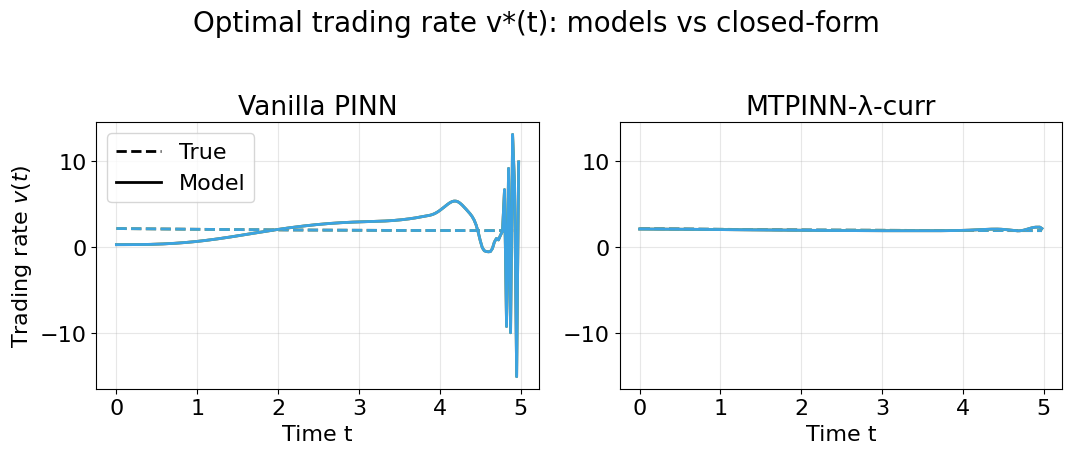

In [1241]:
plot_helper.trading_rate_trajectory_multi(models, paths, T, X0, lam, kappa, dt, d3=False)

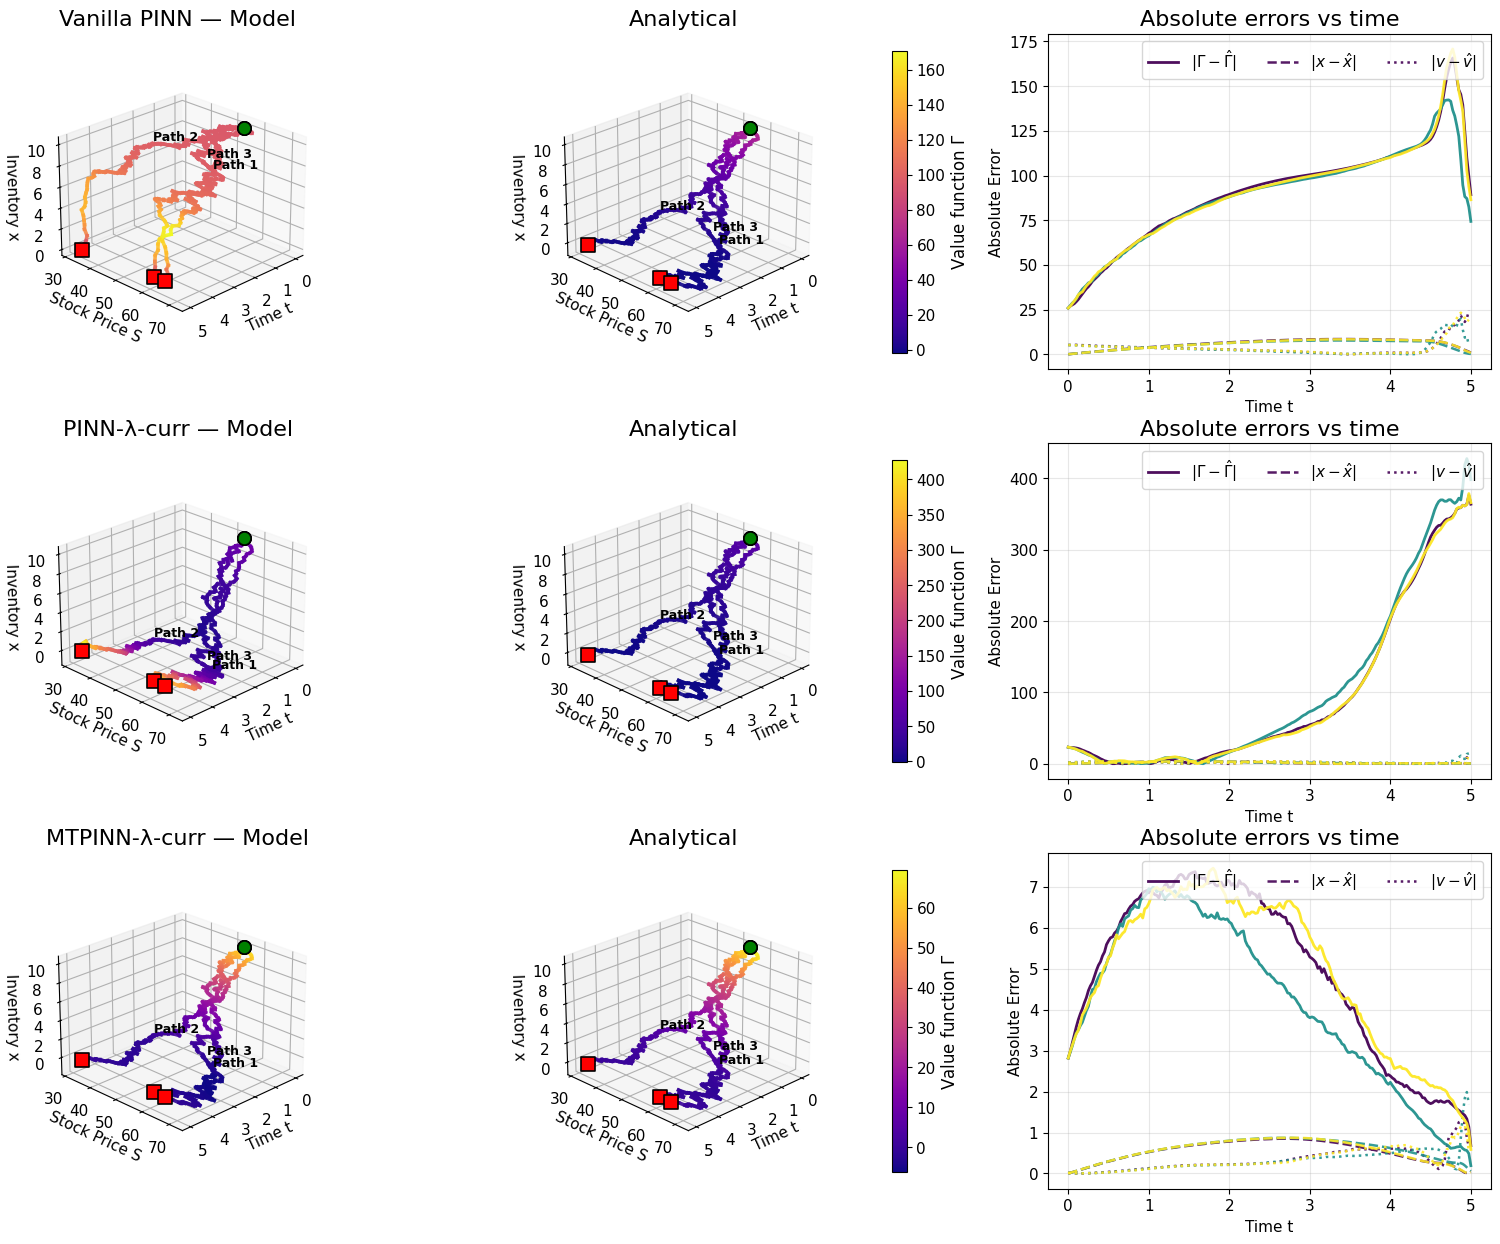

In [1300]:
matplotlib.rcParams.update({'font.size': 11})

plot_helper.plot_comparison_with_errors_multi(models, paths, T, X0, lam, kappa, sigma, dt, d3=True, figsize_per_row=(20, 5))


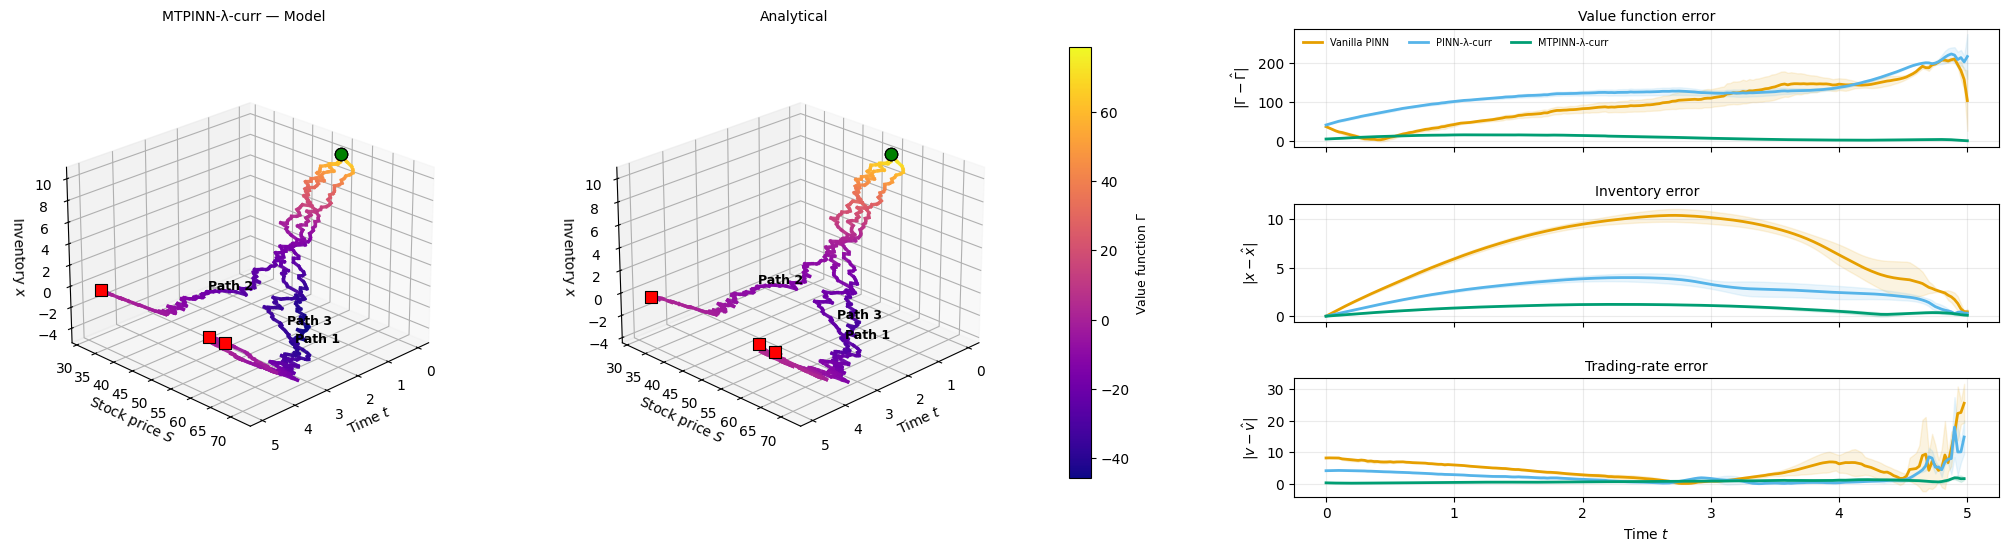

In [1093]:
plot_helper.plot_mt3d_plus_allmodels_error_split(models, paths, T, X0, lam, kappa, sigma, dt, mt_key="MTPINN-λ-curr", path_ids=(0, 1, 2), d3=True, cmap_name="plasma", figsize=(20, 5.4))